In [1]:
import cv2
import numpy as np

In [2]:
path = "/content/Picture1.jpg"
img = cv2.imread(path)

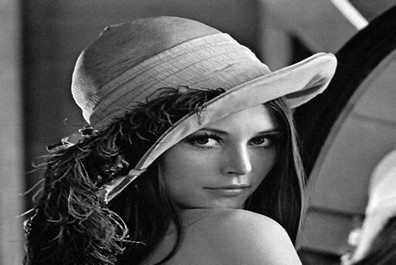

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
height, width, channels = img.shape
img.shape

(265, 396, 3)

In [5]:
total_pixels = height * width
total_pixels

104940

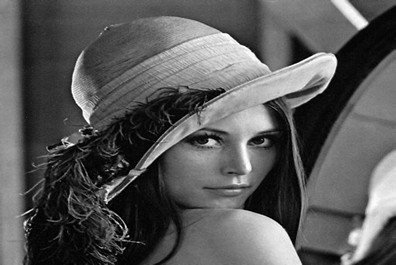

In [6]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)
cv2_imshow(gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
threshold_value = 128
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

In [8]:
cv2.imwrite("binary_image_threshold_128.jpg", binary_image)

True

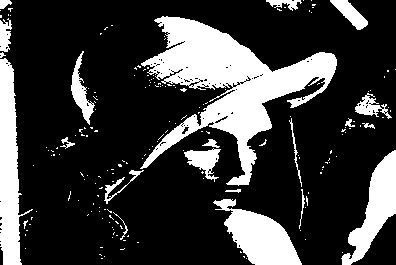

In [9]:
cv2_imshow( binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [11]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

In [12]:
cv2.imwrite("sobel_edge.jpg", np.uint8(sobel_combined))

True

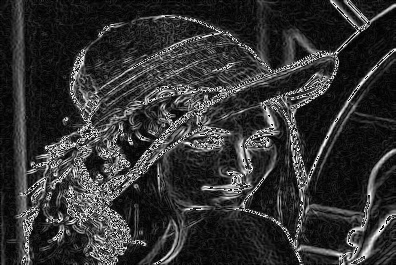

In [13]:
cv2_imshow(np.uint8(sobel_combined))

In [14]:
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(image, -1, kernelx)
prewitt_y = cv2.filter2D(image, -1, kernely)
prewitt_combined = prewitt_x + prewitt_y
cv2.imwrite("prewitt_edge.jpg", prewitt_combined)

True

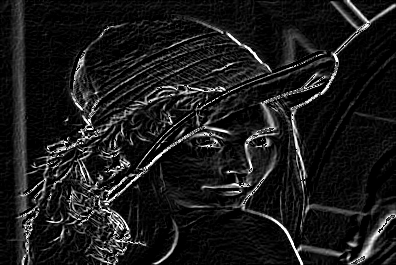

In [15]:
cv2_imshow(prewitt_combined)

In [16]:
roberts_cross_x = np.array([[1, 0], [0, -1]])
roberts_cross_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(image, -1, roberts_cross_x)
roberts_y = cv2.filter2D(image, -1, roberts_cross_y)
roberts_combined = roberts_x + roberts_y
cv2.imwrite("roberts_edge.jpg", roberts_combined)

True

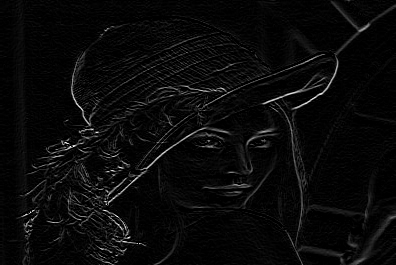

In [17]:
cv2_imshow(roberts_combined)

In [18]:
canny_edges = cv2.Canny(image, 100, 200)
cv2.imwrite("canny_edge.jpg", canny_edges)

True

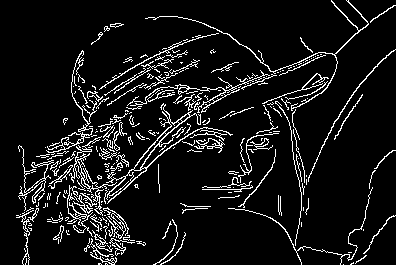

In [19]:
cv2_imshow(canny_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

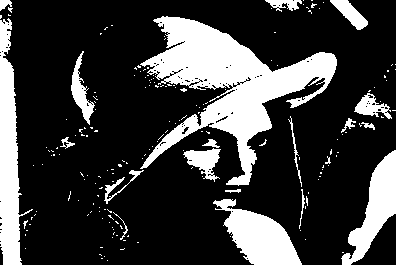

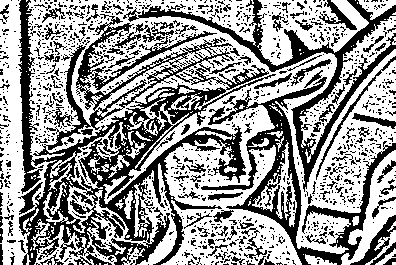

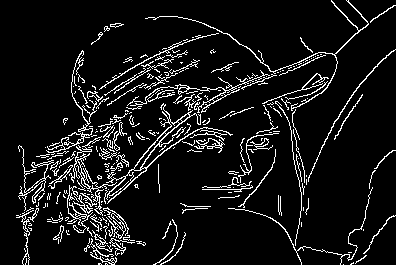

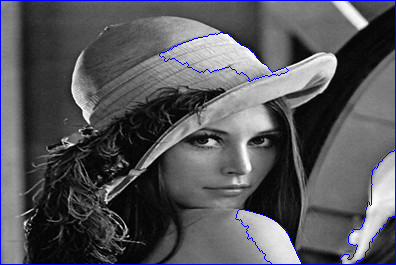

In [21]:
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("global_threshold.jpg", global_thresh)

adaptive_thresh = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
cv2.imwrite("adaptive_threshold.jpg", adaptive_thresh)

cv2.imwrite("edge_based_segmentation.jpg", canny_edges)

original_image = cv2.imread(path)
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(global_thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

markers = cv2.watershed(original_image, markers)
original_image[markers == -1] = [255, 0, 0]

cv2.imwrite("watershed_segmentation.jpg", original_image)

cv2_imshow(global_thresh)
cv2_imshow( adaptive_thresh)
cv2_imshow( canny_edges)
cv2_imshow( original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
